In [192]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import svm, linear_model, neural_network, naive_bayes, neighbors, tree, ensemble, linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn import preprocessing
from tqdm import tqdm_notebook as tqdm
import time
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [202]:
kval = [1, 3, 5, 9, 17, 33, 65, 129, 257, 413]
w = ['uniform', 'distance']
conf=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
ridge=[100000000.0, 1000000.0, 10000.0, 100.0, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05]
kval_knn = [1, 3, 5, 9, 17, 33, 65, 129, 257, 313]

In [201]:
files = os.path.join(os.getcwd(),"csv_files", "*.csv")
print(files)
datasets = glob.glob(files)
datasets

/home/pranav/Project/csv_files/*.csv


['/home/pranav/Project/csv_files/electricity_normalised.csv',
 '/home/pranav/Project/csv_files/pc4.csv',
 '/home/pranav/Project/csv_files/credit.csv',
 '/home/pranav/Project/csv_files/MagicTelescope.csv',
 '/home/pranav/Project/csv_files/irish.csv',
 '/home/pranav/Project/csv_files/pc1.csv',
 '/home/pranav/Project/csv_files/tic-tac-toe.csv',
 '/home/pranav/Project/csv_files/ionosphere.csv',
 '/home/pranav/Project/csv_files/diabetes.csv']

In [ ]:
xx, yy = read_csv('/home/pranav/Project/csv_files/pc4.csv')
yy

In [195]:
def read_csv(file_path):
    print(file_path)
    #X = []
    dataframe = pd.read_csv(file_path)
    #print(dataframe)
    
    category = np.logical_not(
    np.logical_or(np.array(dataframe.dtypes == np.float64), np.array(dataframe.dtypes == np.int64)))
    for cat_cols in dataframe.select_dtypes(['object']).columns:
        dataframe[cat_cols] = dataframe[cat_cols].astype('category')
        dataframe[cat_cols] = pd.Categorical.from_array(dataframe[cat_cols]).codes
    for cat_cols in dataframe.select_dtypes(['bool']).columns:
        dataframe[cat_cols] = dataframe[cat_cols].astype('category')
        dataframe[cat_cols] = pd.Categorical.from_array(dataframe[cat_cols]).codes  # Have to see an alternative
    
    classes = np.array(dataframe[dataframe.columns[-1]])
    a_enc = pd.factorize(classes)
    Y = np.array(a_enc[0])
    #for row in dataframe.as_matrix():
    #    row = np.array(row)
    #    X.append(np.array(row[0:len(row) - 1]).astype(float))
    X = dataframe.as_matrix()[:, :-1]
    #print(X)
    #print(Y)
    return X, Y

In [ ]:
    category = np.logical_not(
        np.logical_or(np.array(dataframe.dtypes == np.float64), np.array(dataframe.dtypes == np.int64)))
    for cat_cols in dataframe.select_dtypes(['object']).columns:
        dataframe[cat_cols] = dataframe[cat_cols].astype('category')
        dataframe[cat_cols] = pd.Categorical.from_array(dataframe[cat_cols]).codes
    for cat_cols in dataframe.select_dtypes(['bool']).columns:
        dataframe[cat_cols] = dataframe[cat_cols].astype('category')
        dataframe[cat_cols] = pd.Categorical.from_array(dataframe[cat_cols]).codes  # Have to see an alternative

In [196]:
def compute(model, dataset, folds =10 , seed=42):
    #print(dataset)
    X, y = read_csv(dataset)
    #print(X)
    #print(y)
    kf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)
    accs = np.zeros(folds)   
    f1_scores = np.zeros(folds)
    btime = np.zeros(folds)
    i = 0 
    for index_train, index_test in kf.split(X,y):
        t0=time.time()
        model.fit(X[index_train], y[index_train])
        btime[i] = round(time.time()-t0, 6)
        
        y_true = y[index_test]
        y_pred = model.predict(X[index_test])
        accs[i] = accuracy_score(y_true, y_pred)
        f1_scores[i] = f1_score(y_true, y_pred, average='micro')
        i+=1
    return np.mean(accs), np.mean(f1_scores), np.mean(btime)

In [206]:
#KNN
n_datasets = len(datasets)
p1_knn = 2
p2_knn = 10
shape1 = (n_datasets, p1_knn, p2_knn)
accuracies_knn = np.zeros(shape1)
f1_scores_knn = np.zeros(shape1)
build_time_knn = np.zeros(shape1)
for d in tqdm(enumerate(datasets)):
    for i in tqdm(range(p1_knn)):
        for j in tqdm(range(p2_knn)):
            m = neighbors.KNeighborsClassifier(weights = w[i], n_neighbors = kval_knn[j], algorithm = 'brute')
            
            #print(compute(m, d))
            result = compute(m, d[1])
            accuracies_knn[d[0], i,j] = result[0]
            f1_scores_knn[d[0], i,j] = result[1]
            build_time_knn[d[0], i,j] = result[2]

/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead



/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/

/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.cs

In [213]:
for d in enumerate(datasets):
    df1 = pd.DataFrame(accuracies_knn[d[0]], columns=kval, index=w)
    df2 = pd.DataFrame(f1_scores_knn[d[0]], columns=kval, index=w)
    df3 = pd.DataFrame(build_time_knn[d[0]], columns=kval, index=w)
    x=str(d[0])
    path1 = '/home/pranav/Project/results_sklearn/knn/d_' + x + '_acc_knn' 
    df1.to_csv(path_or_buf=path1)
    path2 = '/home/pranav/Project/results_sklearn/knn/d_' + x + '_fm_knn' 
    df2.to_csv(path_or_buf=path2)
    path3 = '/home/pranav/Project/results_sklearn/knn/d_' + x + '_bt_knn' 
    df3.to_csv(path_or_buf=path3)
    

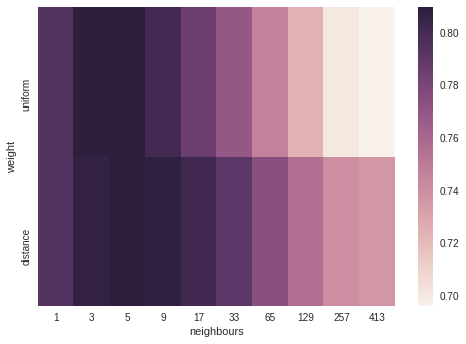

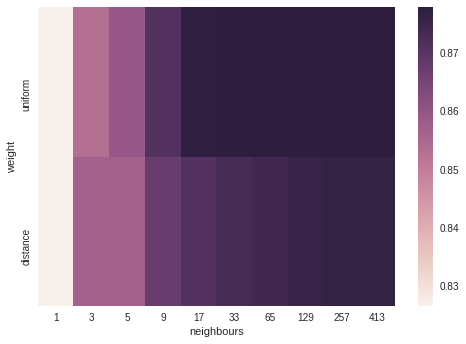

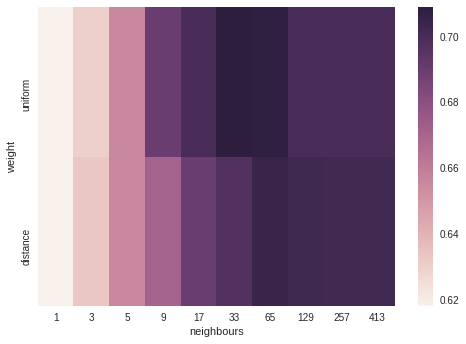

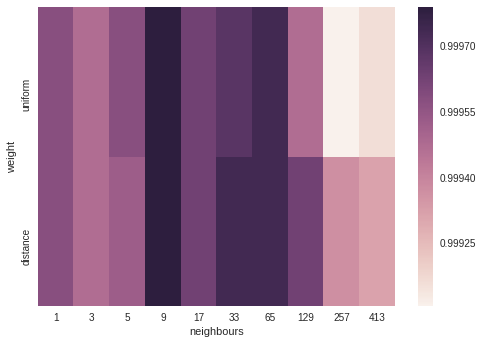

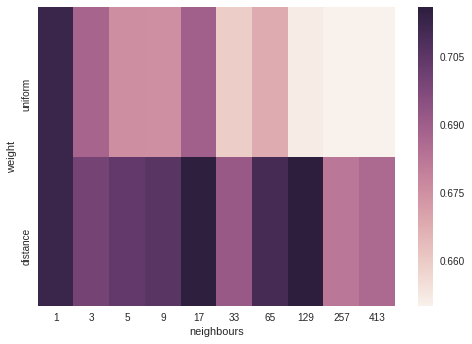

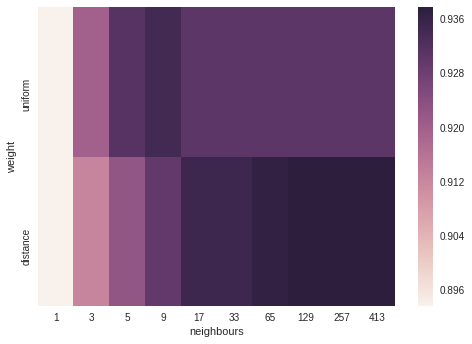

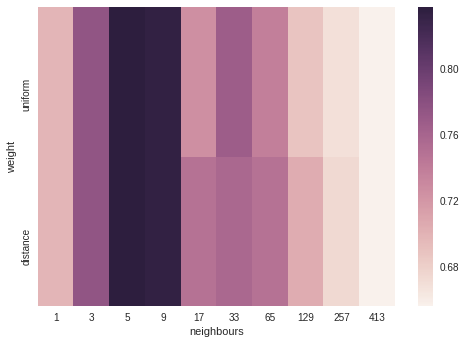

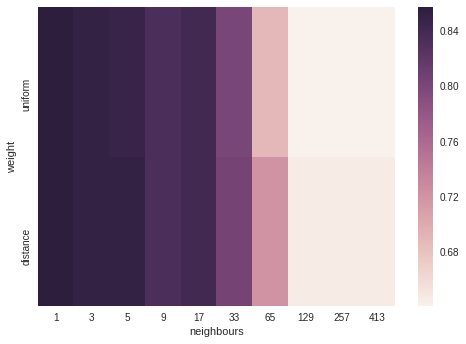

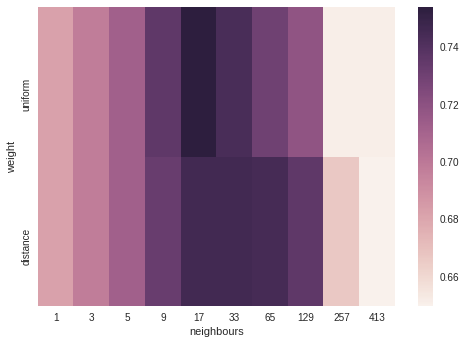

In [207]:
for d in enumerate(datasets):
    ax = sns.heatmap(accuracies_knn[d[0]], xticklabels=kval, yticklabels=w)
    #plt.xticks(np.arange(accuracies[0].shape[1]), kval)
    plt.xlabel('neighbours')
    plt.ylabel('weight')
    plt.show()


In [176]:
n_datasets = len(datasets)
p1_c45 = 10
p2_c45 = 10
shape2 = (n_datasets, p1_c45, p2_c45)
accuracies_c45 = np.zeros(shape2)
f1_scores_c45 = np.zeros(shape2)
build_time_c45 = np.zeros(shape2)
for d in tqdm(enumerate(datasets)):
    for i in tqdm(range(p1_c45)):
        for j in tqdm(range(p2_c45)):
            m = tree.DecisionTreeClassifier(min_impurity_split = conf[i], min_samples_leaf = kval[j])
            #print(m)
            #print(compute(m, d))
            result = compute(m, d[1])
            accuracies_c45[d[0], i,j] = result[0]
            f1_scores_c45[d[0], i,j] = result[1]
            build_time_c45[d[0], i,j] = result[2]

/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv

/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/

/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_

In [214]:
for d in enumerate(datasets):
    df1 = pd.DataFrame(accuracies_c45[d[0]], columns=kval, index=conf)
    df2 = pd.DataFrame(f1_scores_c45[d[0]], columns=kval, index=conf)
    df3 = pd.DataFrame(build_time_c45[d[0]], columns=kval, index=conf)
    y=str(d[0])
    path1 = '/home/pranav/Project/results_sklearn/c45/d_' + y + '_acc_c45' 
    df1.to_csv(path_or_buf=path1)
    path2 = '/home/pranav/Project/results_sklearn/c45/d_' + y + '_fm_c45' 
    df2.to_csv(path_or_buf=path2)
    path3 = '/home/pranav/Project/results_sklearn/c45/d_' + y + '_bt_c45' 
    df3.to_csv(path_or_buf=path3)

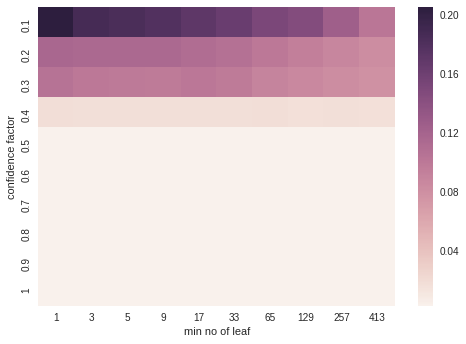

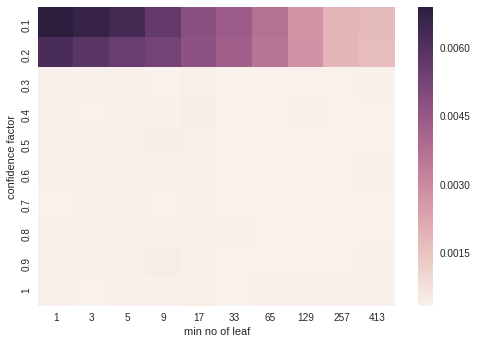

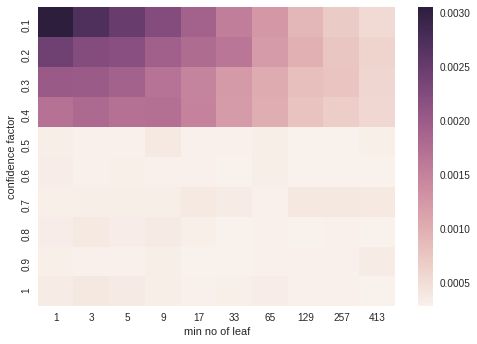

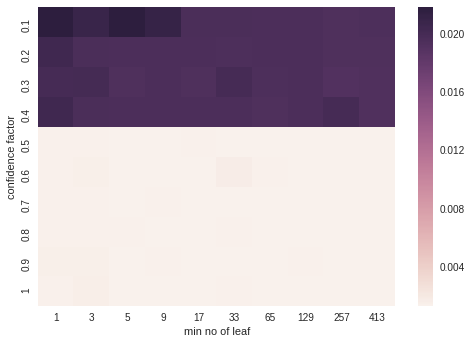

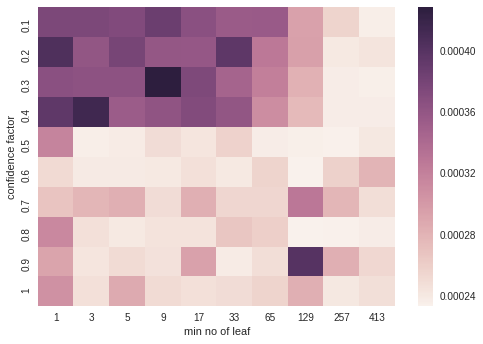

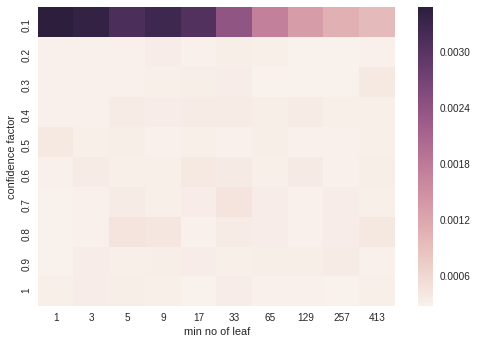

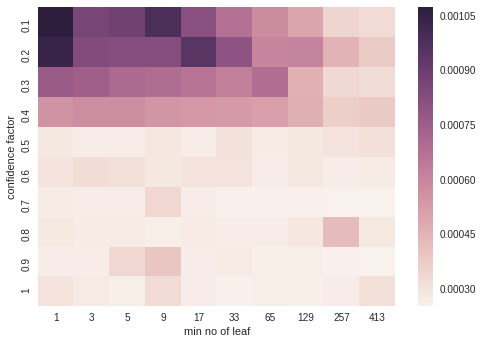

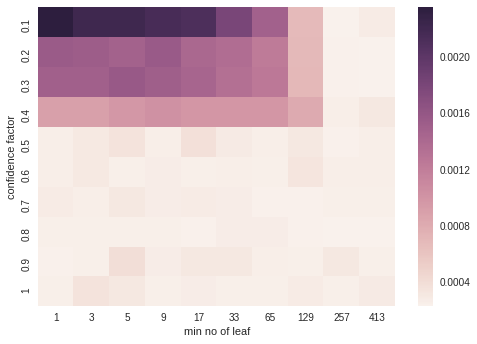

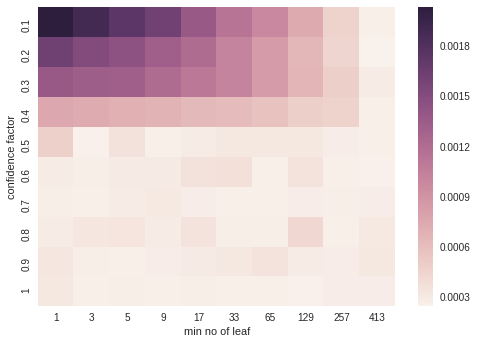

In [188]:
for d in enumerate(datasets):
    ax = sns.heatmap(build_time_c45[d[0]], xticklabels=kval, yticklabels=conf)
    plt.xlabel('min no of leaf')
    plt.ylabel('confidence factor')
    plt.show()

In [189]:
#RandomForest
n_datasets = len(datasets)
p1_rf = 10
p2_rf = 10
shape3 = (n_datasets, p1_rf, p2_rf)
accuracies_rf = np.zeros(shape3)
f1_scores_rf = np.zeros(shape3)
build_time_rf = np.zeros(shape3)
for d in tqdm(enumerate(datasets)):
    for i in tqdm(range(p1_rf)):
        for j in tqdm(range(p2_rf)):
            m = ensemble.RandomForestClassifier(n_estimators = kval[i], max_depth = kval[j])
            #print(m)
            #print(compute(m, d))
            result = compute(m, d[1])
            accuracies_rf[d[0], i,j] = result[0]
            f1_scores_rf[d[0], i,j] = result[1]
            build_time_rf[d[0], i,j] = result[2]

/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv
/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/credit.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv
/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv
/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv
/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv
/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/MagicTelescope.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv
/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/irish.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv
/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc1.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv
/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/tic-tac-toe.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv
/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/ionosphere.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv
/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/diabetes.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


In [215]:
for d in enumerate(datasets):
    df1 = pd.DataFrame(accuracies_rf[d[0]], columns=kval, index=kval)
    df2 = pd.DataFrame(f1_scores_rf[d[0]], columns=kval, index=kval)
    df3 = pd.DataFrame(build_time_rf[d[0]], columns=kval, index=kval)
    z=str(d[0])
    path1 = '/home/pranav/Project/results_sklearn/randomforest/d_' + z + '_acc_rf' 
    df1.to_csv(path_or_buf=path1)
    path2 = '/home/pranav/Project/results_sklearn/randomforest/d_' + z + '_fm_rf' 
    df2.to_csv(path_or_buf=path2)
    path3 = '/home/pranav/Project/results_sklearn/randomforest/d_' + z + '_bt_rf' 
    df3.to_csv(path_or_buf=path3)

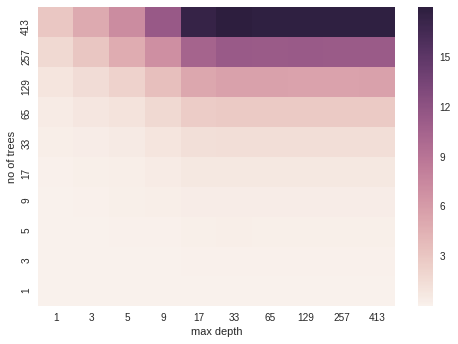

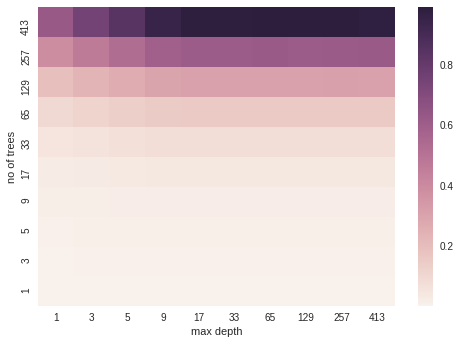

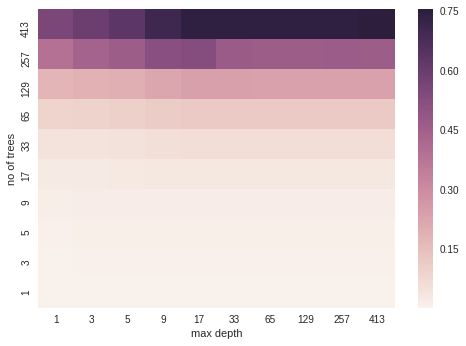

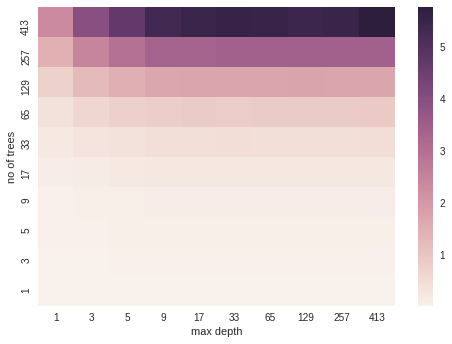

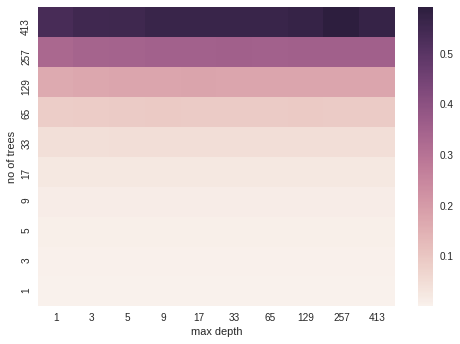

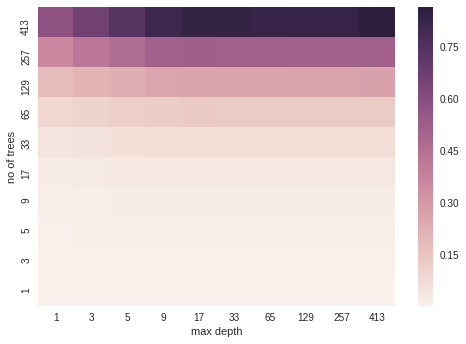

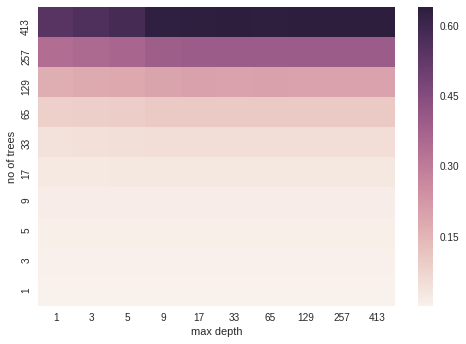

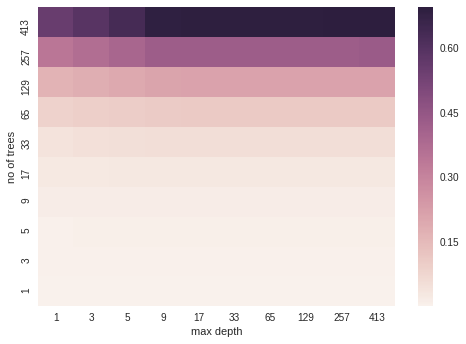

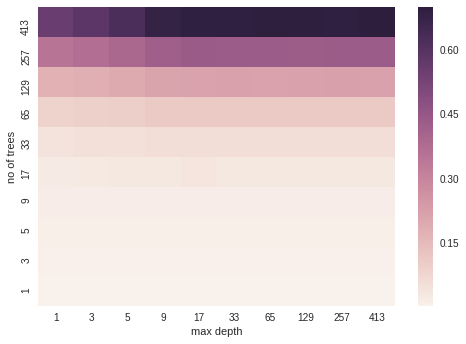

In [238]:
for d in enumerate(datasets):
    ax = sns.heatmap(build_time_rf[d[0]][::-1], yticklabels=kval[::-1], xticklabels=kval)
    plt.ylabel('no of trees')
    plt.xlabel('max depth')
    plt.show()

In [197]:
n_datasets = len(datasets)
p1_lg = 10
p2_lg = 10
shape4 = (n_datasets, p1_lg, p2_lg)
accuracies_lg = np.zeros(shape4)
f1_scores_lg = np.zeros(shape4)
build_time_lg = np.zeros(shape4)
for d in tqdm(enumerate(datasets)):
    for i in tqdm(range(p1_lg)):
        for j in tqdm(range(p2_lg)):
            m = linear_model.LogisticRegression(max_iter = kval[i], C = ridge[j])
            #print(m)
            #print(compute(m, d))
            result = compute(m, d[1])
            accuracies_lg[d[0], i,j] = result[0]
            f1_scores_lg[d[0], i,j] = result[1]
            build_time_lg[d[0], i,j] = result[2]

/home/pranav/Project/csv_files/electricity_normalised.csv


/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/Project/csv_files/electricity_normalised.csv
/home/pranav/P

/home/pranav/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_files/pc4.csv
/home/pranav/Project/csv_

In [216]:
for d in enumerate(datasets):
    df1 = pd.DataFrame(accuracies_lg[d[0]], columns=kval, index=kval)
    df2 = pd.DataFrame(f1_scores_lg[d[0]], columns=kval, index=kval)
    df3 = pd.DataFrame(build_time_lg[d[0]], columns=kval, index=kval)
    w=str(d[0])
    path1 = '/home/pranav/Project/results_sklearn/logistic/d_' + w + '_acc_lg' 
    df1.to_csv(path_or_buf=path1)
    path2 = '/home/pranav/Project/results_sklearn/logistic/d_' + w + '_fm_lg' 
    df2.to_csv(path_or_buf=path2)
    path3 = '/home/pranav/Project/results_sklearn/logistic/d_' + w + '_bt_lg' 
    df3.to_csv(path_or_buf=path3)

In [230]:
df1

,1,3,5,9,17,33,65,129,257,413
1,0.666644,0.666644,0.666644,0.666644,0.666644,0.666644,0.665345,0.666644,0.664046,0.65364
3,0.680913,0.680913,0.680913,0.680913,0.680913,0.680913,0.680913,0.679631,0.670540,0.65364
5,0.689986,0.689986,0.689986,0.689986,0.689986,0.689986,0.691302,0.679614,0.670540,0.65364
9,0.703008,0.700410,0.703008,0.696497,0.706904,0.703008,0.695181,0.679614,0.670540,0.65364
17,0.762970,0.764320,0.772129,0.764354,0.773377,0.730349,0.696480,0.679614,0.670540,0.65364
33,0.778623,0.778623,0.778623,0.777324,0.773394,0.735543,0.696480,0.679614,0.670540,0.65364
65,0.778623,0.778623,0.778623,0.777324,0.773394,0.735543,0.696480,0.679614,0.670540,0.65364
129,0.778623,0.778623,0.778623,0.777324,0.773394,0.735543,0.696480,0.679614,0.670540,0.65364
257,0.778623,0.778623,0.778623,0.777324,0.773394,0.735543,0.696480,0.679614,0.670540,0.65364
413,0.778623,0.778623,0.778623,0.777324,0.773394,0.735543,0.696480,0.679614,0.670540,0.65364


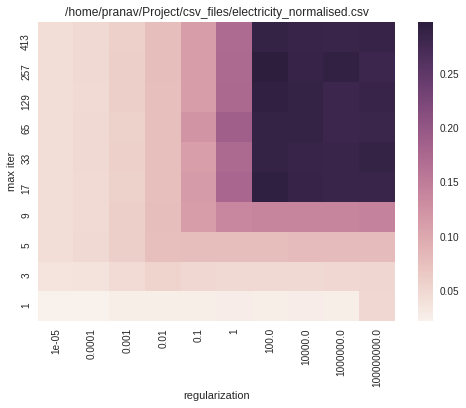

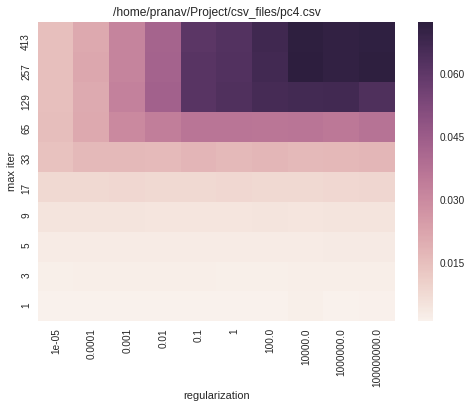

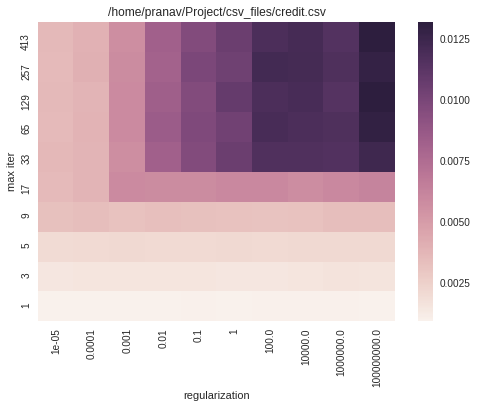

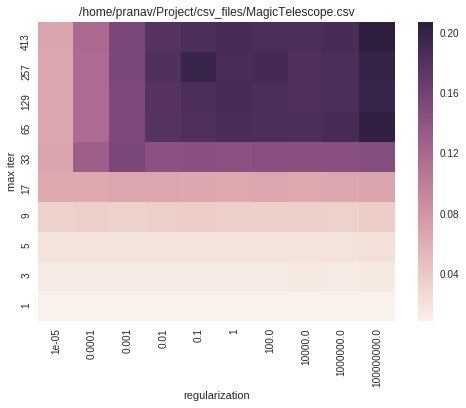

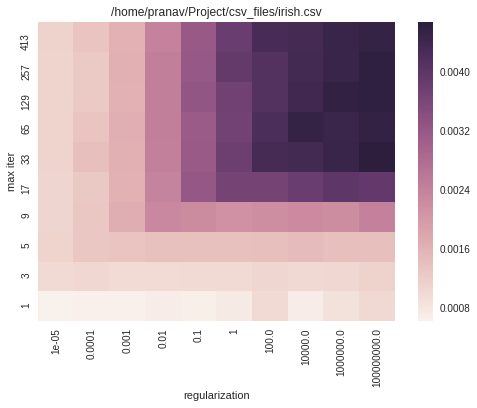

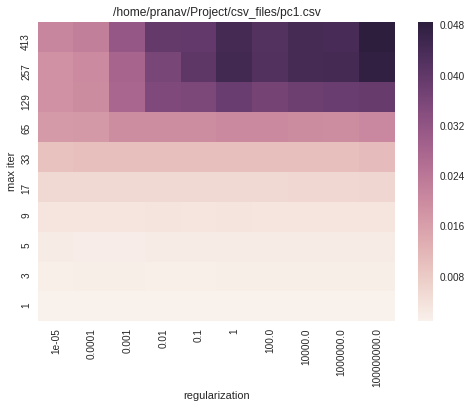

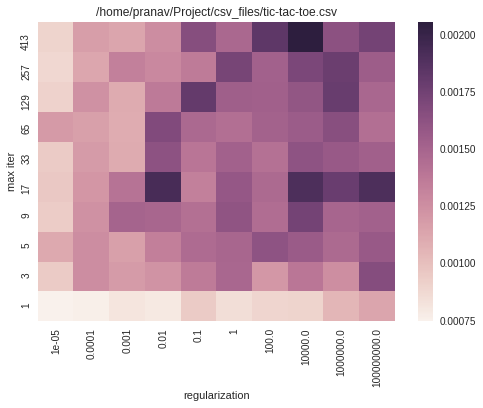

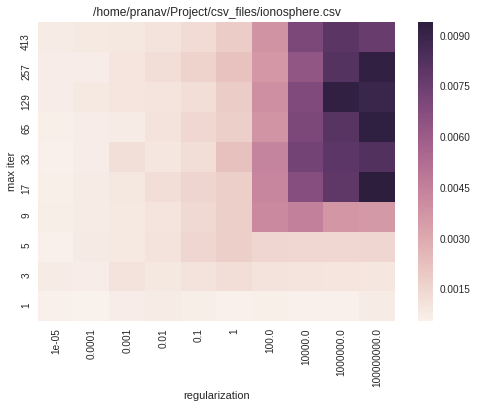

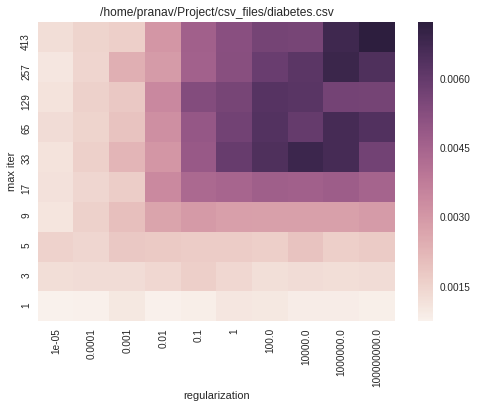

In [229]:
for d in enumerate(datasets):
    ax = sns.heatmap(build_time_lg[d[0]][::-1,::-1], yticklabels=kval[::-1], xticklabels=ridge[::-1])
    plt.ylabel('max iter')
    plt.xlabel('regularization')
    plt.title(d[1])
    plt.savefig()
    plt.show()